In [2]:
!pip install pandas numpy matplotlib seaborn wordcloud missingno scikit-learn

Defaulting to user installation because normal site-packages is not writeable


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from collections import Counter
from wordcloud import WordCloud
import nltk
from sklearn.preprocessing import MinMaxScaler

# Provide the correct file path
file_path = r"C:\Users\Elango Kannan\Downloads\AI-Powered Content Analysis and Recommendation.csv"
  # Change this to your actual path
df = pd.read_csv(file_path)

# Display the rows
df


,title,text,url,authors,timestamp,tags
0,Mental Note Vol. 24,Photo by Josh Riemer on Unsplash\n\nMerry Chri...,https://medium.com/invisible-illness/mental-no...,['Ryan Fan'],2020-12-26 03:38:10.479000+00:00,"['Mental Health', 'Health', 'Psychology', 'Sci..."
1,Your Brain On Coronavirus,Your Brain On Coronavirus\n\nA guide to the cu...,https://medium.com/age-of-awareness/how-the-pa...,['Simon Spichak'],2020-09-23 22:10:17.126000+00:00,"['Mental Health', 'Coronavirus', 'Science', 'P..."
2,Mind Your Nose,Mind Your Nose\n\nHow smell training can chang...,https://medium.com/neodotlife/mind-your-nose-f...,[],2020-10-10 20:17:37.132000+00:00,"['Biotechnology', 'Neuroscience', 'Brain', 'We..."
3,The 4 Purposes of Dreams,Passionate about the synergy between science a...,https://medium.com/science-for-real/the-4-purp...,['Eshan Samaranayake'],2020-12-21 16:05:19.524000+00:00,"['Health', 'Neuroscience', 'Mental Health', 'P..."
4,Surviving a Rod Through the Head,"You’ve heard of him, haven’t you? Phineas Gage...",https://medium.com/live-your-life-on-purpose/s...,['Rishav Sinha'],2020-02-26 00:01:01.576000+00:00,"['Brain', 'Health', 'Development', 'Psychology..."
...,...,...,...,...,...,...
192363,Why do you need a cleaning service?,What could be more important than having a tid...,https://medium.com/@ozneedcleaningau/why-do-yo...,[],2021-11-16 08:17:08.950000+00:00,"['Cleaning', 'Cleaning Services', 'Cleaning Co..."
192364,Daily cleaning and maintenance of bedding,Daily cleaning and maintenance of bedding\n\nW...,https://medium.com/@a198blwt/daily-cleaning-an...,[],2021-11-16 05:27:05.359000+00:00,"['Bedding', 'Cleaning', 'Maintain']"
192365,Beneficial Advice on Bond Cleaning!,The most important chore at the end is bond cl...,https://medium.com/@princegohil/beneficial-adv...,['Prince Shrawan'],2021-11-26 08:20:27.660000+00:00,"['Cleaning', 'End Of Lease Cleaning', 'Cleaners']"
192366,How I Learned Romanian in 37 Easy Steps,How I Learned Romanian in 37 Easy Steps\n\nHey...,https://medium.com/@lifeinromania/how-i-learne...,['Sam Ursu'],2017-11-27 08:09:19.025000+00:00,"['Romania', 'Language Learning', 'Storyofmylife']"


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192368 entries, 0 to 192367
Data columns (total 6 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   title      192363 non-null  object
 1   text       192368 non-null  object
 2   url        192368 non-null  object
 3   authors    192368 non-null  object
 4   timestamp  192366 non-null  object
 5   tags       192368 non-null  object
dtypes: object(6)
memory usage: 8.8+ MB


In [8]:
print(df.isnull().sum())  # Count missing values
print("\nUnique values per column:\n", df.nunique())  # Check unique values in each column

title        5
text         0
url          0
authors      0
timestamp    2
tags         0
dtype: int64

Unique values per column:
 title        187892
text         185474
url          192368
authors       83915
timestamp    191612
tags         183380
dtype: int64


In [10]:
print(df.duplicated().sum())

0


In [12]:
print(df.dtypes)

title        object
text         object
url          object
authors      object
timestamp    object
tags         object
dtype: object


In [14]:
# Handling missing values

# Replace missing titles with "Unknown Title"
df['title'] = df['title'].fillna("Unknown Title")

# Fill missing timestamps using forward fill (propagates previous values)
df['timestamp'] = df['timestamp'].fillna(method='ffill')

# Check if any missing values are left
remaining_missing = df.isnull().sum()

# Display missing values after handling
print("Missing Values After Handling:\n")
print(remaining_missing)

Missing Values After Handling:

title        0
text         0
url          0
authors      0
timestamp    0
tags         0
dtype: int64


C:\Users\Elango Kannan\AppData\Local\Temp\ipykernel_1740\1354844374.py:7: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['timestamp'] = df['timestamp'].fillna(method='ffill')


In [18]:
print(df.isnull().sum())

title        0
text         0
url          0
authors      0
timestamp    0
tags         0
dtype: int64


In [20]:
print("Missing values:\n", df.isnull().sum())
print("\nDuplicates:", df.duplicated().sum())
print("\nData types:\n", df.dtypes)

Missing values:
 title        0
text         0
url          0
authors      0
timestamp    0
tags         0
dtype: int64

Duplicates: 0

Data types:
 title        object
text         object
url          object
authors      object
timestamp    object
tags         object
dtype: object


In [22]:
df.describe()

,title,text,url,authors,timestamp,tags
count,192368,192368,192368,192368,192368,192368
unique,187893,185474,192368,83915,191612,183380
top,by Martino Pietropoli,Learn more. Medium is an open platform where 1...,https://medium.com/invisible-illness/mental-no...,[],2019-03-13 14:21:44.055000+00:00,['Startup']
freq,93,1976,1,30955,22,80


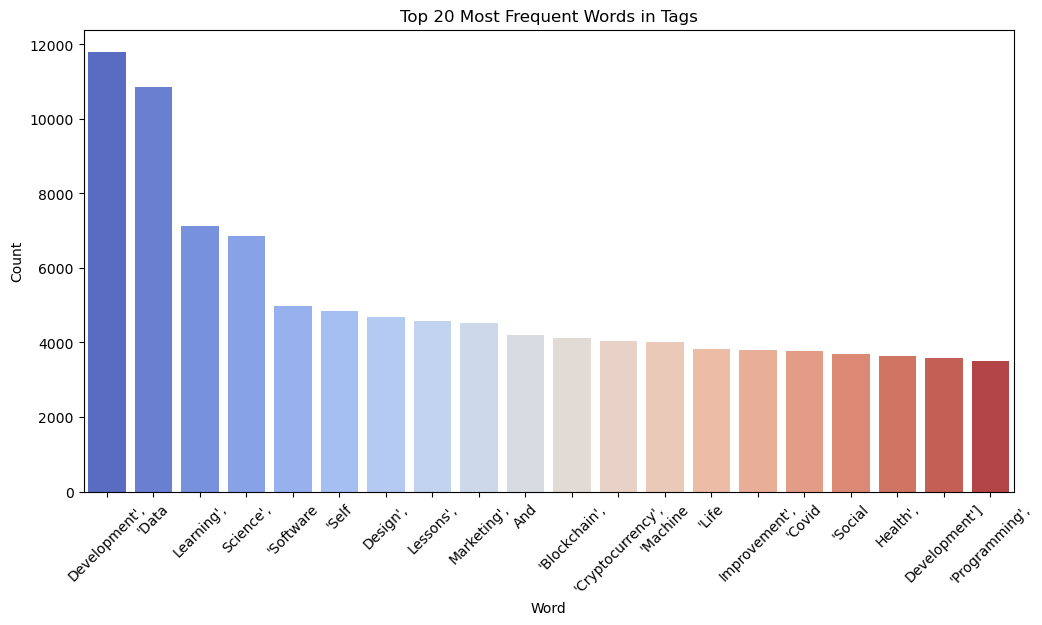

In [26]:

# Ensure 'tags' column is treated as a string
df["tags"] = df["tags"].astype(str)

# Count most common words
word_counts = Counter(" ".join(df["tags"]).split())

# Get top 20 words
common_words = word_counts.most_common(20)

# Convert to DataFrame
common_df = pd.DataFrame(common_words, columns=["Word", "Count"])

# Plot
plt.figure(figsize=(12,6))
sns.barplot(x="Word", y="Count", hue="Word", data=common_df, palette="coolwarm", legend=False)
plt.xticks(rotation=45)
plt.title("Top 20 Most Frequent Words in Tags")
plt.show()


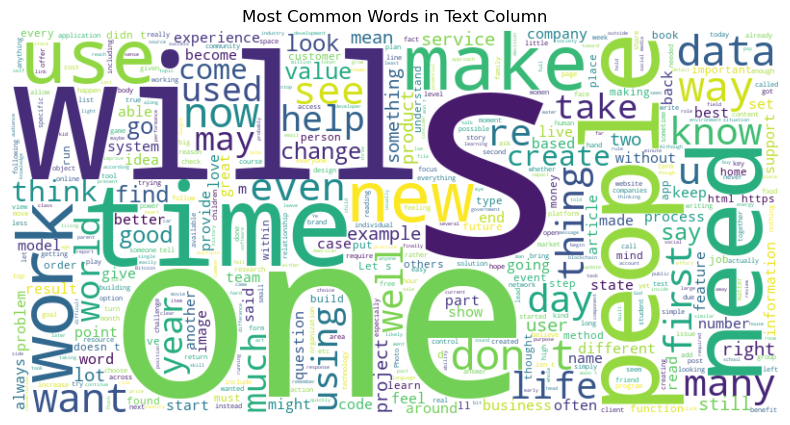

In [28]:
if 'text' in df.columns:
    text_data = " ".join(df['text'].astype(str).sample(5000, random_state=42))  # Use only a subset

    wordcloud = WordCloud(width=800, height=400, background_color='white', max_words=500).generate(text_data)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title("Most Common Words in Text Column")
    plt.show()

In [30]:
import nltk
nltk.download('punkt')  # Already downloaded
nltk.download('punkt_tab')  # This should fix the issue

[nltk_data] Downloading package punkt to C:\Users\Elango
[nltk_data]     Kannan\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to C:\Users\Elango
[nltk_data]     Kannan\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

[nltk_data] Downloading package stopwords to C:\Users\Elango
[nltk_data]     Kannan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\Elango
[nltk_data]     Kannan\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
C:\Users\Elango Kannan\AppData\Local\Temp\ipykernel_1740\632574773.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Word', data=common_words, palette='Blues_r')


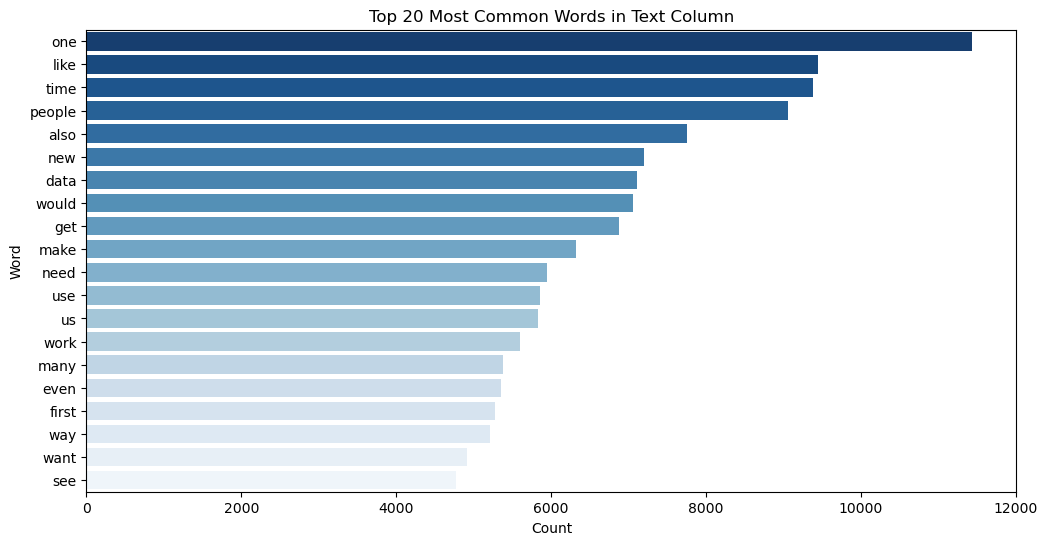

In [32]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

nltk.download('stopwords')
nltk.download('punkt')

# Load English stopwords
stop_words = set(stopwords.words('english'))

# Process text column efficiently using a sample to reduce memory load
sample_text = " ".join(df['text'].astype(str).sample(5000, random_state=42))  # Use a subset

# Tokenize words
all_words = word_tokenize(sample_text.lower())  # More efficient than .split()

# Remove stopwords
filtered_words = [word for word in all_words if word.isalpha() and word not in stop_words]  # Keeps only words (removes numbers/symbols)

# Count word frequency
word_freq = Counter(filtered_words)

# Convert to DataFrame
common_words = pd.DataFrame(word_freq.most_common(20), columns=['Word', 'Count'])

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x='Count', y='Word', data=common_words, palette='Blues_r')
plt.title("Top 20 Most Common Words in Text Column")
plt.show()

In [34]:
df['article_length'] = df['text'].apply(lambda x: len(str(x)))
df['word_count'] = df['text'].apply(lambda x: len(str(x).split()))

In [36]:
df.drop(columns=['url'], inplace=True)

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192368 entries, 0 to 192367
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   title           192368 non-null  object
 1   text            192368 non-null  object
 2   authors         192368 non-null  object
 3   timestamp       192368 non-null  object
 4   tags            192368 non-null  object
 5   article_length  192368 non-null  int64 
 6   word_count      192368 non-null  int64 
dtypes: int64(2), object(5)
memory usage: 10.3+ MB


In [42]:
df['reading_time'] = df['word_count'] / 200  # Estimate reading time in minutes


In [44]:
df['popularity_score'] = (df['word_count'] * 0.5) + (df['reading_time'] * 1.2)

In [46]:
tag_engagement = df.groupby('tags')['reading_time'].mean()  # Example proxy metric
df = df.merge(tag_engagement, on='tags', suffixes=('', '_avg'))


In [48]:
from collections import Counter

top_keywords = ['breaking', 'exclusive', 'trending', 'must read']
df['keyword_score'] = df['text'].apply(lambda x: sum(1 for word in top_keywords if word in str(x).lower()))

In [49]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df[['popularity_score', 'keyword_score']] = scaler.fit_transform(df[['popularity_score', 'keyword_score']])

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192368 entries, 0 to 192367
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   title             192368 non-null  object 
 1   text              192368 non-null  object 
 2   authors           192368 non-null  object 
 3   timestamp         192368 non-null  object 
 4   tags              192368 non-null  object 
 5   article_length    192368 non-null  int64  
 6   word_count        192368 non-null  int64  
 7   reading_time      192368 non-null  float64
 8   popularity_score  192368 non-null  float64
 9   reading_time_avg  192368 non-null  float64
 10  keyword_score     192368 non-null  float64
dtypes: float64(4), int64(2), object(5)
memory usage: 16.1+ MB


In [54]:
print(df.info())  # Confirm column types and missing values
print(df.describe())  # Summarize numerical data
print(df.head())  # Preview the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192368 entries, 0 to 192367
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   title             192368 non-null  object 
 1   text              192368 non-null  object 
 2   authors           192368 non-null  object 
 3   timestamp         192368 non-null  object 
 4   tags              192368 non-null  object 
 5   article_length    192368 non-null  int64  
 6   word_count        192368 non-null  int64  
 7   reading_time      192368 non-null  float64
 8   popularity_score  192368 non-null  float64
 9   reading_time_avg  192368 non-null  float64
 10  keyword_score     192368 non-null  float64
dtypes: float64(4), int64(2), object(5)
memory usage: 16.1+ MB
None
       article_length     word_count   reading_time  popularity_score  \
count   192368.000000  192368.000000  192368.000000     192368.000000   
mean      5097.748134     845.763796       4.228819

In [63]:
import pandas as pd
import numpy as np
import re
import nltk
import ast
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.feature_extraction.text import TfidfVectorizer

# Download required resources (run only once)
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()


[nltk_data] Downloading package punkt to C:\Users\Elango
[nltk_data]     Kannan\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\Elango
[nltk_data]     Kannan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Elango
[nltk_data]     Kannan\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [65]:
def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text)
    tokens = nltk.word_tokenize(text)
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    return ' '.join(tokens)


In [69]:
df['clean_text'] = df['text'].apply(clean_text)

In [78]:
df['tags_list'] = df['tags'].apply(lambda x: ast.literal_eval(x))

In [80]:
from sklearn.preprocessing import MultiLabelBinarizer
from collections import Counter

# Count tag frequency
tag_counter = Counter(tag for tags in df['tags_list'] for tag in tags)

# Keep top 500 tags
top_tags = set([tag for tag, _ in tag_counter.most_common(500)])

# Filter tags to include only top ones
df['filtered_tags'] = df['tags_list'].apply(lambda tags: [tag for tag in tags if tag in top_tags])

# Binarize filtered tags
mlb = MultiLabelBinarizer()
tag_matrix = mlb.fit_transform(df['filtered_tags'])

# Create DataFrame
tag_df = pd.DataFrame(tag_matrix, columns=mlb.classes_)


In [82]:
vectorizer = TfidfVectorizer(max_features=1000)
tfidf_matrix = vectorizer.fit_transform(df['clean_text'])
feature_names = vectorizer.get_feature_names_out()

In [83]:
def extract_keywords(index, top_n=10):
    row = tfidf_matrix[index].toarray().flatten()
    top_indices = row.argsort()[-top_n:][::-1]
    return [feature_names[i] for i in top_indices]


In [86]:
df['top_keywords'] = df.index.to_series().apply(lambda i: extract_keywords(i, top_n=5))


In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192368 entries, 0 to 192367
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   title             192368 non-null  object 
 1   text              192368 non-null  object 
 2   authors           192368 non-null  object 
 3   timestamp         192368 non-null  object 
 4   tags              192368 non-null  object 
 5   article_length    192368 non-null  int64  
 6   word_count        192368 non-null  int64  
 7   reading_time      192368 non-null  float64
 8   popularity_score  192368 non-null  float64
 9   reading_time_avg  192368 non-null  float64
 10  keyword_score     192368 non-null  float64
 11  clean_title       192368 non-null  object 
 12  clean_text        192368 non-null  object 
 13  tags_list         192368 non-null  object 
 14  filtered_tags     192368 non-null  object 
 15  top_keywords      192368 non-null  object 
dtypes: float64(4), int64

In [104]:
df.to_csv("CodelerateDataset.csv", index=False)
print("Processed dataset saved successfully!")

Processed dataset saved successfully!


In [101]:
df.head()

,title,text,authors,timestamp,tags,article_length,word_count,reading_time,popularity_score,reading_time_avg,keyword_score,clean_title,clean_text,tags_list,filtered_tags,top_keywords
0,Mental Note Vol. 24,Photo by Josh Riemer on Unsplash\n\nMerry Chri...,['Ryan Fan'],2020-12-26 03:38:10.479000+00:00,"['Mental Health', 'Health', 'Psychology', 'Sci...",5018,862,4.310,0.045332,4.310,0.0,mental note vol,photo josh riemer unsplash merry christmas hap...,"['Mental Health', 'Health', 'Psychology', 'Sci...","['Mental Health', 'Health', 'Psychology', 'Sci...","['christmas', 'loss', 'life', 'everyone', 'wit..."
1,Your Brain On Coronavirus,Your Brain On Coronavirus\n\nA guide to the cu...,['Simon Spichak'],2020-09-23 22:10:17.126000+00:00,"['Mental Health', 'Coronavirus', 'Science', 'P...",7293,1094,5.470,0.057576,5.470,0.0,brain coronavirus,brain coronavirus guide curious troubling impa...,"['Mental Health', 'Coronavirus', 'Science', 'P...","['Mental Health', 'Coronavirus', 'Science', 'P...","['study', 'brain', 'covid', 'patient', 'indivi..."
2,Mind Your Nose,Mind Your Nose\n\nHow smell training can chang...,[],2020-10-10 20:17:37.132000+00:00,"['Biotechnology', 'Neuroscience', 'Brain', 'We...",5730,910,4.550,0.047865,4.550,0.0,mind nose,mind nose smell training change brain six week...,"['Biotechnology', 'Neuroscience', 'Brain', 'We...","['Neuroscience', 'Wellness', 'Science']","['brain', 'training', 'task', 'system', 'mind']"
3,The 4 Purposes of Dreams,Passionate about the synergy between science a...,['Eshan Samaranayake'],2020-12-21 16:05:19.524000+00:00,"['Health', 'Neuroscience', 'Mental Health', 'P...",146,19,0.095,0.000844,0.095,0.0,purpose dream,passionate synergy science technology provide ...,"['Health', 'Neuroscience', 'Mental Health', 'P...","['Health', 'Neuroscience', 'Mental Health', 'P...","['science', 'care', 'technology', 'check', 'fo..."
4,Surviving a Rod Through the Head,"You’ve heard of him, haven’t you? Phineas Gage...",['Rishav Sinha'],2020-02-26 00:01:01.576000+00:00,"['Brain', 'Health', 'Development', 'Psychology...",2326,383,1.915,0.020054,1.915,0.0,surviving rod head,youve heard havent phineas gage railroad worke...,"['Brain', 'Health', 'Development', 'Psychology...","['Health', 'Development', 'Psychology', 'Scien...","['brain', 'went', 'person', 'worker', 'handle']"
